Team  : Pure Way 
Project Title : Air quality prediction with image

In [47]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt 
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [59]:
def imshow(title = "Image", image = None, size = 30):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

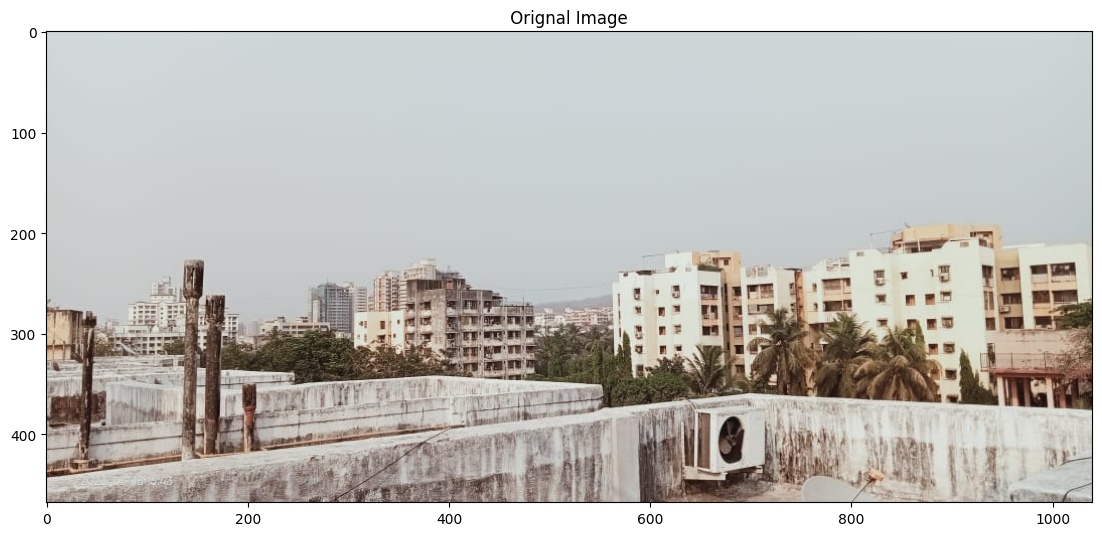

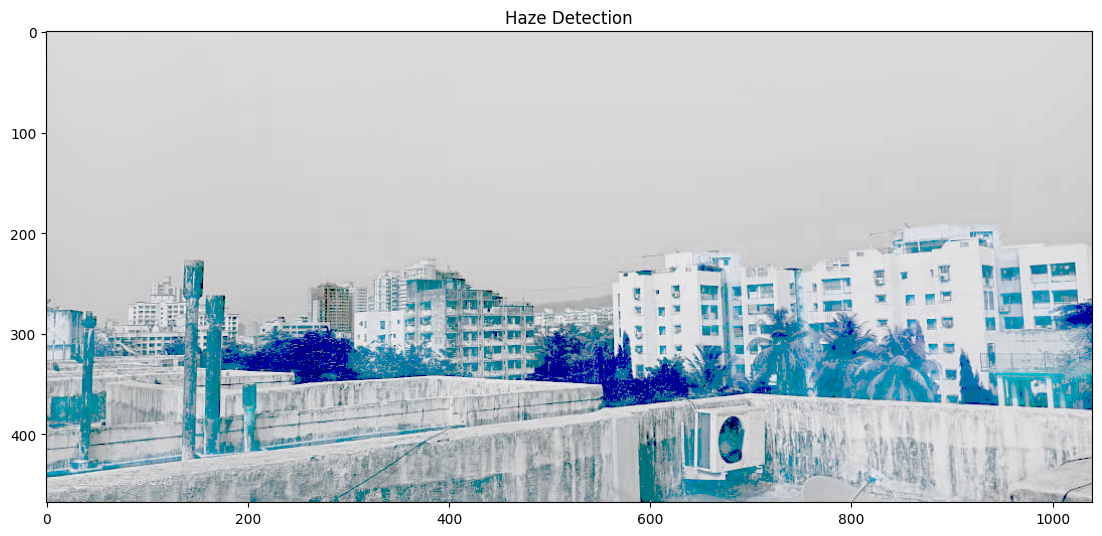

True

In [63]:
# Dark Channel attempt 2 : 
import numpy as np

def haze_free_image(img, window_size):

    max_img = cv2.dilate(img, np.ones((window_size, window_size), np.uint8))
    haze_remover = np.max(max_img, axis=2)
    haze_remover_gray = cv2.cvtColor(haze_remover, cv2.COLOR_GRAY2RGB)
    haze_f_image = np.minimum(img.astype(np.float32) * (255 / haze_remover_gray), 255).astype(np.uint8)
    haze_s = img-haze_f_image
    ret,haze = cv2.threshold(haze_s, 102, 255, cv2.THRESH_TOZERO)
    return haze_f_image,haze

def dark_channel_prior(img, window_size):

    min_img = cv2.erode(img, np.zeros((window_size, window_size), np.uint8))
    dark_channel = np.min(min_img, axis=2)
    return dark_channel

img = cv2.imread("/content/gdrive/MyDrive/Air_Calibre/Pure_way/train/150_to_250_Very_Unhealthy/225 (14).jpg")


darky = dark_channel_prior(img, 1)
hazy,the_haze = haze_free_image(img, 1)

# Display the og, dark channel prior, haze free image 
imshow(" Orignal Image ", img)
imshow("Haze Detection", the_haze)
cv2.imwrite("/content/gdrive/MyDrive/Air_Calibre/Pure_way/dark_channel_p.png",the_haze)


1/1 [==============================] - 2s 2s/step


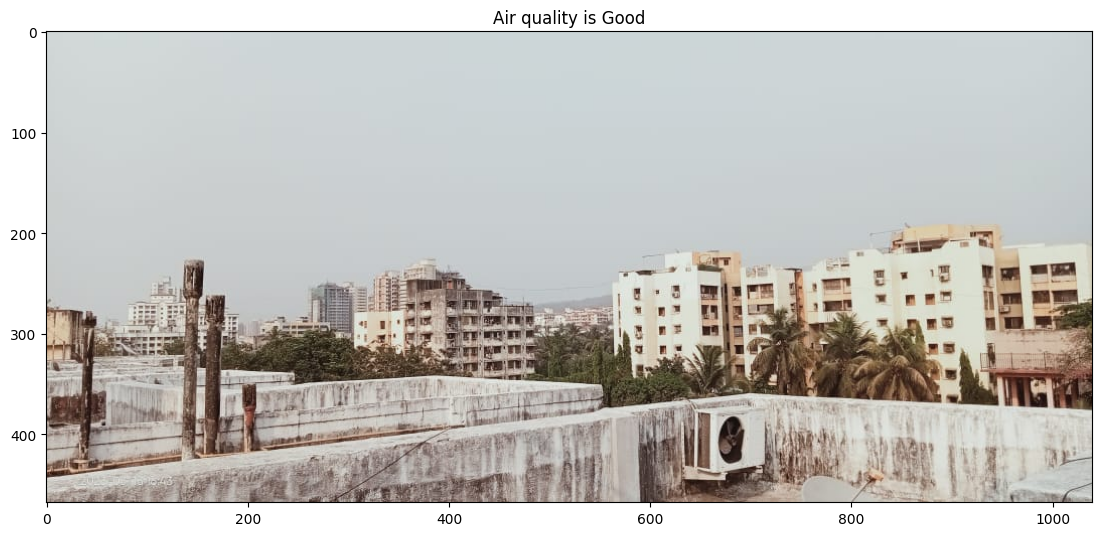

1/1 [==============================] - 0s 244ms/step


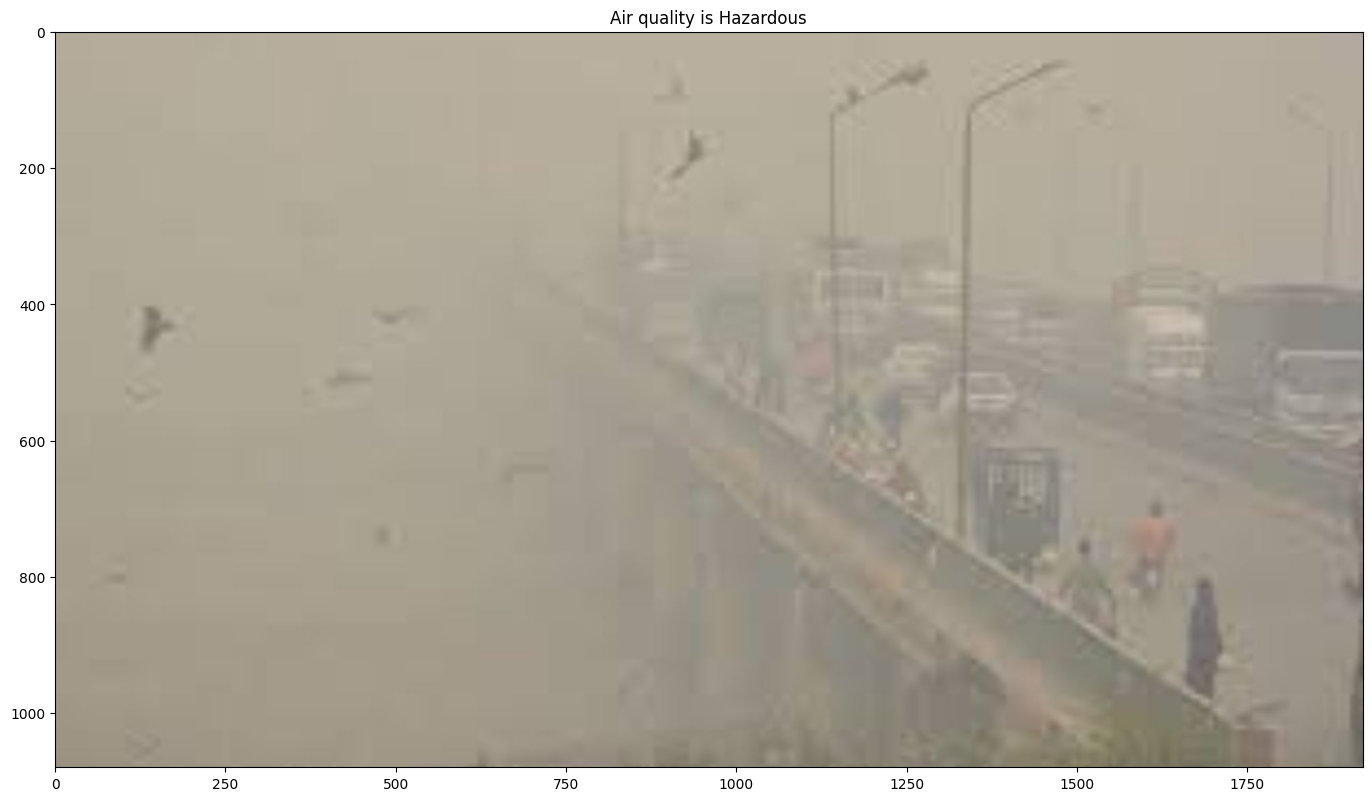

1/1 [==============================] - 0s 147ms/step


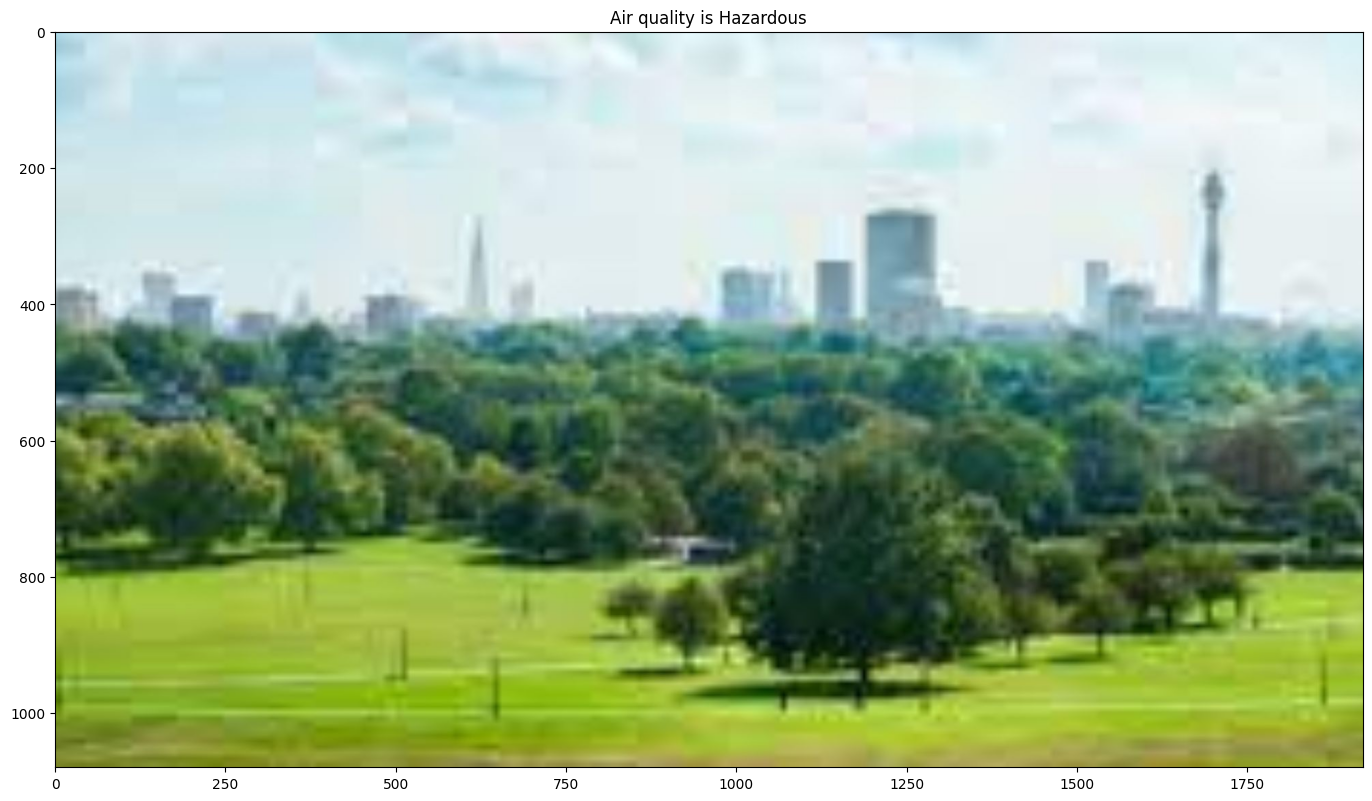

1/1 [==============================] - 0s 214ms/step


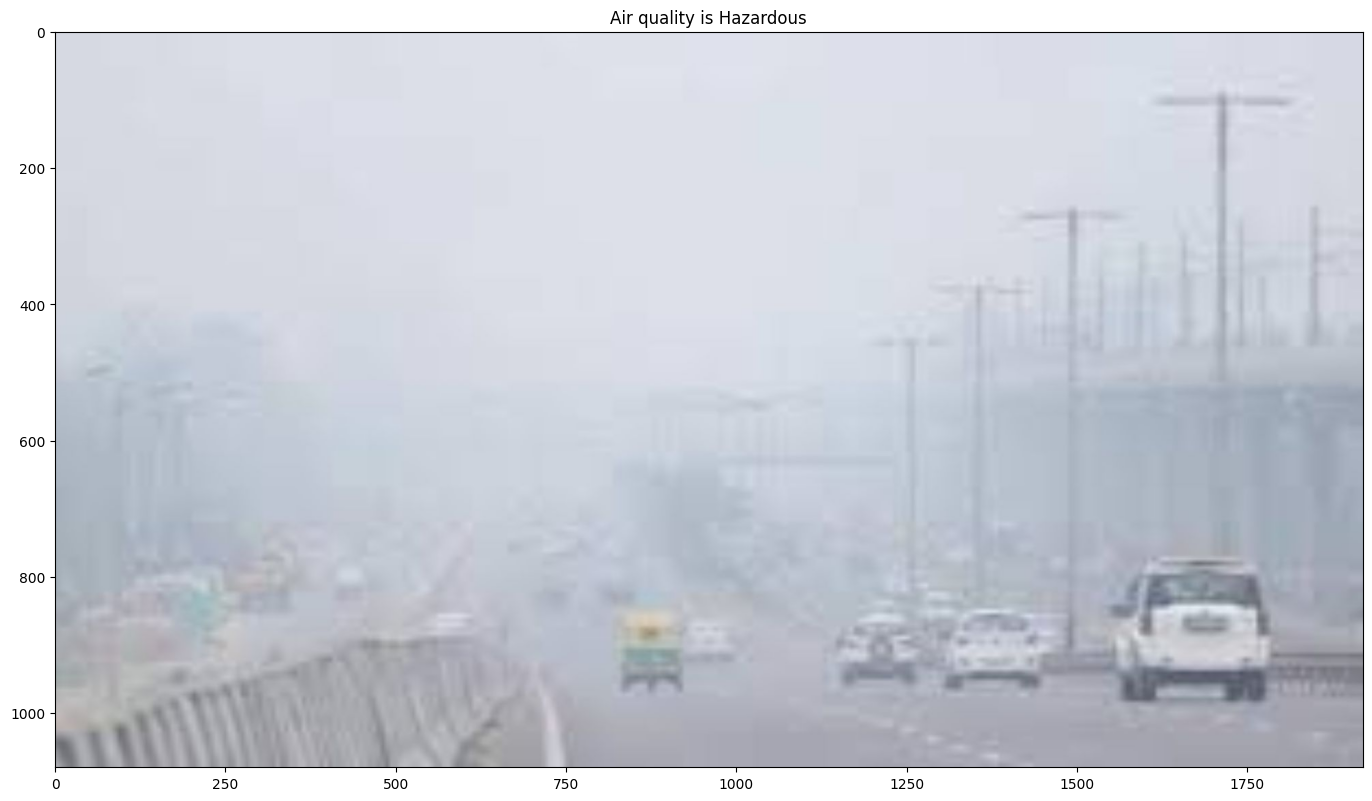

In [72]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# Load the model
model = load_model('/content/gdrive/MyDrive/Air_Calibre/Pure_way/64_2_15_model_inception.h5')

# Define a function to make predictions using the model
image1 = cv2.imread("/content/gdrive/MyDrive/Air_Calibre/Pure_way/train/150_to_250_Very_Unhealthy/225 (14).jpg")
image2 = cv2.imread("/content/gdrive/MyDrive/Air_Calibre/Pure_way/train/250_and_above_Hazardous/260 (11).jpg")
image3 = cv2.imread("/content/gdrive/MyDrive/Air_Calibre/Pure_way/train/0_to_34_Good_to_Moderate/15 (13).jpg")
image4 = cv2.imread("/content/gdrive/MyDrive/Air_Calibre/Pure_way/train/250_and_above_Hazardous/260 (14).jpg")



def predict(image):
    # Preprocess the input image
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    # image = tf.keras.applications.resnet_v2.preprocess_input(image)
    image = tf.expand_dims(image, axis=0)
    
    # Make a prediction using the model
    prediction = model.predict(image)
    
    return prediction

        
# Make a prediction using the model
prediction1 = predict(image1)

# Get the predicted pollution level
pollution_levels = ['Good', 'Unhealthy for Sensitive', 'Unhealthy','Very Unhealthy','Hazardous'] 
predicted_level = pollution_levels[np.argmax(prediction1)]
imshow("Air quality is " + predicted_level, image1)

prediction2 = predict(image2)

# Get the predicted pollution level
pollution_levels = ['Good', 'Unhealthy for Sensitive', 'Unhealthy','Very Unhealthy','Hazardous'] 
predicted_level = pollution_levels[np.argmax(prediction2)]
imshow("Air quality is " + predicted_level, image2)

prediction3 = predict(image2)

# Get the predicted pollution level
pollution_levels = ['Good', 'Unhealthy for Sensitive', 'Unhealthy','Very Unhealthy','Hazardous'] 
predicted_level = pollution_levels[np.argmax(prediction3)]
imshow("Air quality is " + predicted_level, image3)

prediction4 = predict(image4)

# Get the predicted pollution level
pollution_levels = ['Good', 'Unhealthy for Sensitive', 'Unhealthy','Very Unhealthy','Hazardous'] 
predicted_level = pollution_levels[np.argmax(prediction4)]
imshow("Air quality is " + predicted_level, image4)